# Answer to questions in the Proposal

####  Question1 - Best ranked courses in each department based on student evaluations and grades received

In [294]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [295]:
df = pd.read_csv("Preprocess_Completed.csv")

In [296]:
df.head(3)

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,BENG,BENG 100,"Abbasi, Shaghayegh",S119,30,9,66.7,100.0,7.39,3.11,2.70
1,BENG,BENG 100,"Alexandrov, Ludmil B",SP18,163,74,76.4,90.1,7.20,3.18,2.91
2,BENG,BENG 100,"Alexandrov, Ludmil B",SP19,174,80,60.0,80.0,7.38,3.14,2.87


In [297]:
df.set_index(["Department"], inplace=True)

In [298]:
#extract all the rows from the ECE department
ece_df = df.loc["ECE"]
ece_df.to_csv("ECE2.csv")

In [299]:
#make 3 groups based on term, instructor, and course number
terms = ece_df.groupby("Term")
instructor = ece_df.groupby("Instructor")
course = ece_df.groupby("Course Number")

In [300]:
#check the sizes - there are info for ece from 53 different quarters
len(terms)

53

In [301]:
#check group size for instructor - 112 instructors taught courses in this class
len(instructor)

112

In [302]:
# check the group size for course - 72 different courses where taught in this database
len(course)

72

In [303]:
terms.get_group("WI19")["Enroll"].max()

169

In [304]:
#check how many
terms.size()

Term
FA07    18
FA08    20
FA09    19
FA10    21
FA11    18
FA12    16
FA13    18
FA14    20
FA15    21
FA16    22
FA17    23
FA18    29
S111     1
S112     2
S113     3
S114     3
S115     3
S116     3
S117     4
S118     3
S119     2
S211     1
S212     1
S215     2
S216     2
S217     1
S218     4
S219     2
S316     1
SP08    20
SP09    18
SP10    23
SP11    21
SP12    20
SP13    19
SP14    18
SP15    21
SP16    26
SP17    24
SP18    27
SP19    30
WI08    13
WI09    18
WI10    16
WI11    16
WI12    16
WI13    20
WI14    23
WI15    21
WI16    24
WI17    28
WI18    30
WI19    32
dtype: int64

In [305]:
terms.size().min()

1

In [306]:
terms.size().max()

32

In [307]:
 terms.get_group("WI19")["Enroll"].mean()

73.75

In [308]:
#create a new dataframe to store the highest number of Enrollment for each quarter from the terms group
highest_enrollment_df = pd.DataFrame(columns=ECE_df.columns)
highest_enrollment_df

,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received


In [309]:
#write a function to extract the highest entrollment size from each unique quarter
for term, data in terms:
    highest_data_in_term = data.nlargest(1, "Enroll")
    highest_enrollment_df = highest_enrollment_df.append(highest_data_in_term)

In [310]:
new_df.sort_values(by=["Term"],inplace=True)

In [311]:
highest_enrollment_df.head(100)

,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
ECE,ECE 102,"Larson, Lawrence E.",FA07,108,60,89.30,98.20,8.960,3.120,2.04
ECE,ECE 101,"Siegel, Paul H.",FA08,108,66,90.60,91.90,9.410,3.080,2.65
ECE,ECE 15,"Orlitsky, Alon",FA09,103,58,79.30,65.50,10.360,3.280,2.69
ECE,ECE 15,"Orlitsky, Alon",FA10,179,91,67.80,60.20,10.360,3.010,2.54
ECE,ECE 15,"Orlitsky, Alon",FA11,261,112,73.20,64.70,10.225,2.755,2.41
ECE,ECE 15,"Cruz, Rene L",FA12,178,73,74.60,35.80,9.990,2.840,3.14
ECE,ECE 15,"Orlitsky, Alon",FA13,382,168,80.90,68.30,10.675,3.075,2.51
ECE,ECE 100,"Sievenpiper, Daniel F.",FA14,227,61,100.00,78.20,9.340,3.090,2.43
ECE,ECE 15,"Orlitsky, Alon",FA15,252,114,79.80,79.80,7.560,3.160,2.51
ECE,ECE 101,"Siegel, Paul H.",FA16,207,104,83.20,94.70,7.860,2.920,2.44


In [312]:
#create a new dataframe to store the highest number of Enrollment for each quarter from the terms group
highest_hours_studied_df = pd.DataFrame(columns=ECE_df.columns)

In [313]:
#write a function to extract the highest hours studied size from each unique quarter
for term, data in terms:
    highest_hours_studied_val = data.nlargest(1, "Study Hrs/wk")
    highest_hours_studied_df = highest_hours_studied_df.append(highest_hours_studied_val)

In [314]:
highest_hours_studied_df.head(100)

,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
ECE,ECE 164,"Galton, Ian A",FA07,65,57,96.4,83.6,9.80,3.43,3.09
ECE,ECE 164,"Galton, Ian A",FA08,40,42,85.7,71.4,10.07,3.02,3.14
ECE,ECE 15,"Orlitsky, Alon",FA09,103,58,79.3,65.5,10.36,3.28,2.69
ECE,ECE 166,"Rebeiz, Gabriel",FA10,57,31,96.7,96.7,13.66,3.36,3.16
ECE,ECE 100,"Sievenpiper, Daniel F.",FA11,95,62,90.3,77.4,12.92,3.20,2.68
ECE,ECE 166,"Rebeiz, Gabriel",FA12,71,36,97.1,100.0,10.96,3.68,3.16
ECE,ECE 102,"Hall, Drew A.",FA13,64,41,94.9,92.3,12.81,3.08,2.73
ECE,ECE 191,"Cosman, Pamela C.",FA14,21,8,100.0,87.5,12.21,3.57,3.60
ECE,ECE 164,"Hall, Drew A.",FA15,83,27,96.2,92.3,12.19,3.65,2.94
ECE,ECE 158A,"Javidi, Tara",FA16,39,14,50.0,33.3,12.50,2.82,3.10


## Grouping based on multiple factors

In [315]:
term_instructor_group = ECE_df.groupby(["Term", "Course Number"])

In [316]:
len(term_instructor_group)

751

In [317]:
term_instructor_group.mean()

Enroll  Evals Made  Rcmnd Class  Rcmnd Instr  \
Term Course Number                                                     
FA07 ECE 101         98.000000        65.0        79.40    79.000000   
     ECE 102        108.000000        60.0        89.30    98.200000   
     ECE 103         39.000000        26.0        61.50    40.000000   
     ECE 15          60.000000        45.0        73.30    53.300000   
     ECE 153         28.000000        21.0        85.70    85.700000   
     ECE 154A        20.000000        11.0       100.00   100.000000   
     ECE 161A        45.000000        28.0        72.00    64.000000   
     ECE 164         65.000000        57.0        96.40    83.600000   
     ECE 166         52.000000        43.0       100.00   100.000000   
     ECE 172A        30.000000        14.0       100.00   100.000000   
     ECE 187         27.000000        22.0        95.20   100.000000   
     ECE 25          62.000000        49.0        91.70    89.400000   
     ECE 30          57.000000        40.0        55.00    75.000000   
     ECE 35          93.000000        57.0        78.20    65.500000   
     ECE 45          53.000000        39.0       100.00   100.000000   
     ECE 53          37.000000        25.0        44.00    56.000000   
     ECE 53A         37.000000        25.0        44.00    56.000000   
     ECE 65          37.000000        19.0        77.80    72.200000   
FA08 ECE 101        108.000000        66.0        90.60    91.900000   
     ECE 102        101.000000        55.0        88.90    90.700000   
     ECE 103         52.000000        46.0        60.90    71.100000   
     ECE 111         23.000000        10.0       100.00   100.000000   
     ECE 15          80.000000        56.0        73.20    67.900000   
     ECE 153         24.000000        23.0        72.70    72.700000   
     ECE 159A        17.000000        15.0       100.00   100.000000   
     ECE 161A        37.000000        23.0        91.30    91.300000   
     ECE 164         40.000000        42.0        85.70    71.400000   
     ECE 166         45.000000        39.0       100.00   100.000000   
     ECE 171B        29.000000        16.0       100.00    93.300000   
     ECE 172A        26.000000        23.0        95.70    82.600000   
...                        ...         ...          ...          ...   
WI18 ECE 45         232.000000       101.0        93.50    84.100000   
     ECE 5          113.000000        42.0       100.00    96.933333   
     ECE 65         117.000000        96.0        85.40    81.300000   
WI19 ECE 100         43.000000        40.0        76.90    74.400000   
     ECE 101         57.000000        38.0        86.10    94.400000   
     ECE 102         65.000000        22.0        88.90    77.800000   
     ECE 107         45.000000        16.0       100.00    81.300000   
     ECE 109        114.000000        46.0        72.10    83.300000   
     ECE 111        137.000000        45.0        84.30    97.850000   
     ECE 121B        31.000000        14.0       100.00   100.000000   
     ECE 125A        28.000000         9.0       100.00   100.000000   
     ECE 134         21.000000        10.0       100.00   100.000000   
     ECE 140A        66.000000        23.0        86.40    90.900000   
     ECE 141A        63.000000        40.0       100.00    97.500000   
     ECE 143         67.000000        54.0        94.30    96.200000   
     ECE 144         23.000000        18.0        94.40   100.000000   
     ECE 15         169.000000        76.0        80.00    90.000000   
     ECE 153         45.000000        15.0       100.00   100.000000   
     ECE 16          21.000000        13.0        92.30    92.300000   
     ECE 161B        43.000000        19.0       100.00   100.000000   
     ECE 172A       109.000000        27.0        84.00    84.000000   
     ECE 175A        90.000000        20.0        81.30    87.500000   
     ECE 180         32.000000        20.5        98.35    96.65

C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


Term  Course Number
FA07  ECE 101          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 102          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 103          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 15           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 153          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 154A         AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 161A         AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 164          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 166          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 172A         AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 187          AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 25           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 30           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 35           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 45           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 53           AxesSubplot(0.125,0.125;0.775x0.755)
      ECE 53A       

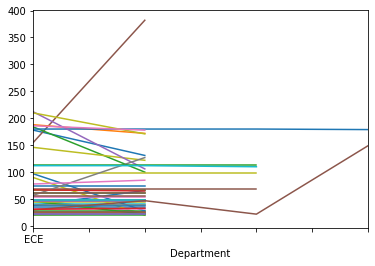

In [318]:
#to specify a specific value as y axis
term_instructor_group["Enroll"].plot()